Task 1
* Import that data into R. Run a linear regression model of Price on all the variables. Use the summary function to show the regression results.
 *  Calculate the fitted values of the response variable, and calculate the residual. Co-list the original y values, fitted yhat value, and the residual together for the first 10 observations. Check if the residuals equal y- yhat

In [9]:
library(fastDummies)
library(dplyr)

car_data = read.csv("C:/Users/Will/Desktop/School/ISYE 6203/HW 1/UsedCars.csv")
head(car_data)

,Id,Model,Price,Age,KM,HP,Metallic,Automatic,CC,Doors,Gears,Weight
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700,192,0,0,1800,3,5,1185
2,2,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,31461,192,0,0,1800,3,6,1185
3,3,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors,19950,22,43610,192,0,0,1800,3,6,1185
4,4,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,19600,25,32189,192,0,0,1800,3,6,1185
5,5,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,21500,31,23000,192,1,0,1800,3,6,1185
6,6,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,22500,32,34131,192,1,0,1800,3,6,1185


In [10]:
car_data = dummy_cols(car_data,select_columns = c("Model"))
car_data = subset(car_data,select = -c(Id,Model)) 

In [12]:
first_price_lm_model = lm(Price~.,data = car_data)

summary(first_price_lm_model)


Call:
lm(formula = Price ~ ., data = car_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2806.8  -446.2     0.0   416.4  4326.4 

Coefficients: (3 not defined because of singularities)
                                                                                      Estimate
(Intercept)                                                                         -2.556e+04
Age                                                                                 -8.459e+01
KM                                                                                  -1.549e-02
HP                                                                                   1.773e+02
Metallic                                                                             2.056e+01
Automatic                                                                           -6.107e+02
CC                                                                                  -6.679e+00
Doors                                     

Warning message:
"not plotting observations with leverage one:
  1, 3, 9, 10, 13, 36, 39, 40, 51, 65, 71, 75, 82, 84, 86, 102, 106, 107, 109, 111, 114, 115, 117, 119, 120, 123, 129, 135, 138, 139, 150, 153, 170, 179, 185, 200, 201, 202, 221, 249, 264, 272, 278, 282, 291, 301, 310, 319, 333, 336, 342, 346, 351, 353, 387, 401, 405, 418, 423, 433, 450, 462, 489, 494, 505, 513, 525, 541, 546, 552, 555, 566, 573, 575, 576, 591, 604, 607, 616, 623, 675, 693, 694, 703, 711, 718, 725, 734, 738, 743, 771, 772, 786, 803, 811, 813, 816, 823, 825, 827, 829, 841, 849, 850, 860, 861, 865, 898, 905, 933, 935, 951, 976, 994, 997, 1005, 1018, 1023, 1046, 1061, 1072, 1077, 1093, 1094, 1095, 1096, 1099, 1101, 1104, 1111, 1128, 1130, 1132, 1135, 1145, 1154, 1167, 1175, 1180, 1183, 1187, 1196, 1207, 1224, 1228, 1245, 1249, 1252, 1254, 1255, 1258"


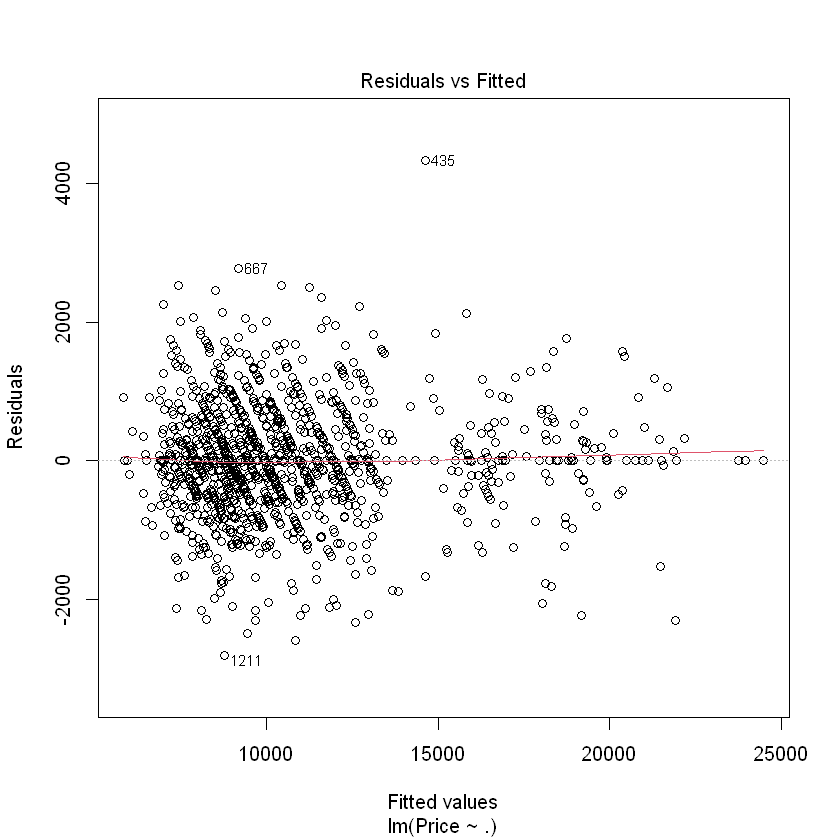

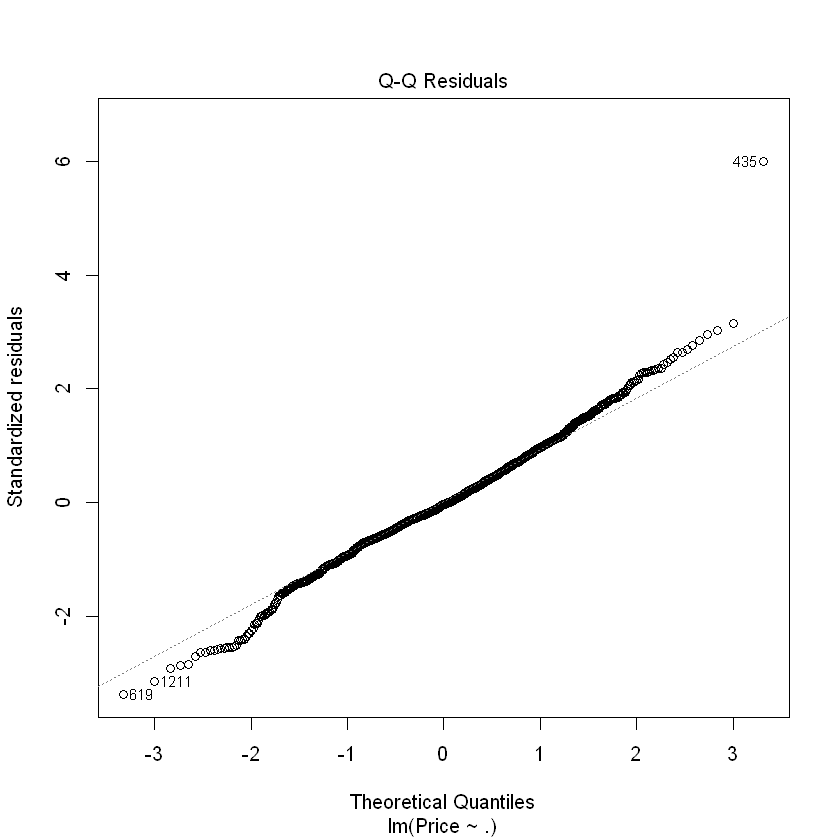

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


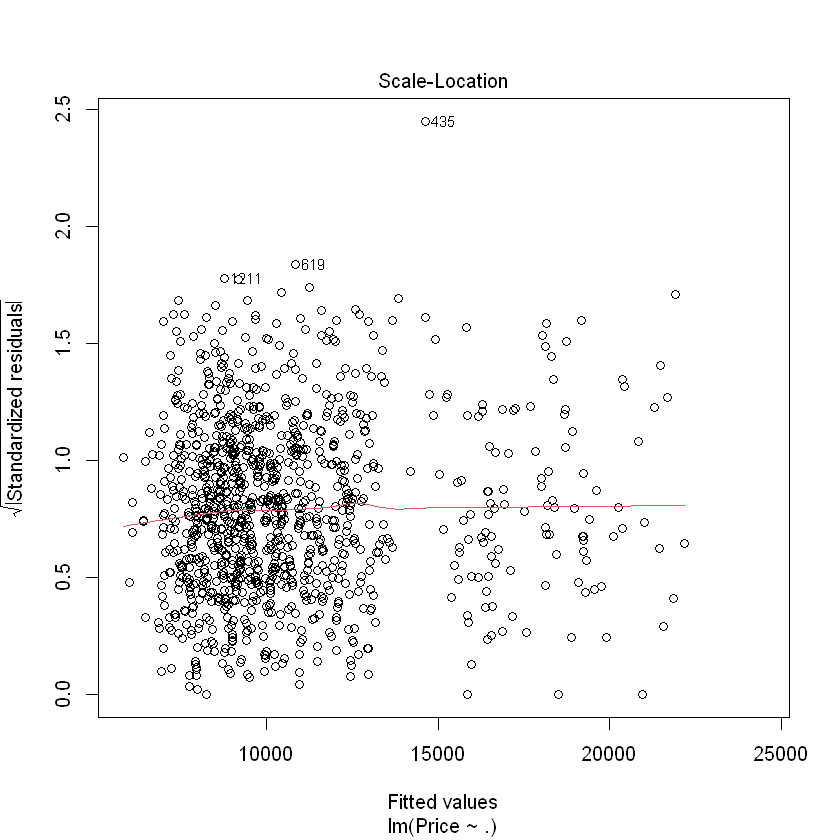

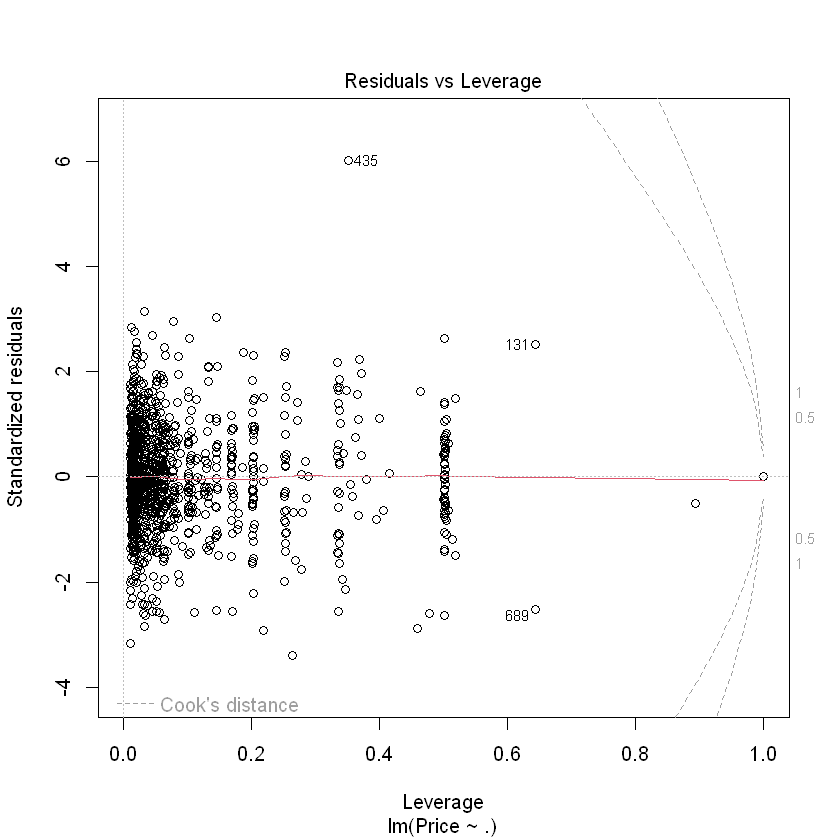

In [13]:
plot(first_price_lm_model)

In [14]:
car_data$first_price_model_fitted = first_price_lm_model$fitted.values

In [15]:
car_data$first_price_model_residuals = first_price_lm_model$residuals

In [16]:
head(car_data[c("Price","first_price_model_fitted","first_price_model_residuals")],10)

,Price,first_price_model_fitted,first_price_model_residuals
,<int>,<dbl>,<dbl>
1,21500,21500.00,-2.486900e-13
2,20950,20950.00,-6.803586e-15
3,19950,19950.00,4.398561e-12
4,19600,21912.54,-2.312539e+03
5,21500,21567.89,-6.788756e+01
6,22500,21310.87,1.189126e+03
7,22000,21867.11,1.328915e+02
8,22750,21691.59,1.058410e+03
9,17950,17950.00,-1.796127e-12


Task 2: t-Statistic and p-value

In [45]:
first_model_coefs = as.data.frame(first_price_lm_model$coefficients)

In [46]:
first_model_se = as.data.frame(sqrt(diag(vcov(first_price_lm_model))))

In [50]:
t_stat_df <- data.frame(
  coefficients = first_price_lm_model$coefficients,
  std_errors = sqrt(diag(vcov(first_price_lm_model)))
)

In [82]:
t_stats <- summary(first_price_lm_model)$coefficients[, "t value"]

In [90]:
t_stat_df$t_stats_model = t_stats

ERROR: Error in `$<-.data.frame`(`*tmp*`, t_stats_model, value = c(`(Intercept)` = -0.489186457881403, : replacement has 260 rows, data has 263


In [93]:
t_stat_df$t_stat <- t_stat_df$coefficients / t_stat_df$std_errors
head(t_stat_df)

,coefficients,std_errors,t_stat
,<dbl>,<dbl>,<dbl>
(Intercept),-2.556226e+04,5.225464e+04,-0.4891865
Age,-8.459143e+01,4.182622e+00,-20.2244993
KM,-1.549022e-02,1.157533e-03,-13.3820999
HP,1.772759e+02,2.777417e+02,0.6382761
Metallic,2.055718e+01,6.183747e+01,0.3324389
Automatic,-6.107064e+02,1.317729e+03,-0.4634536


In [94]:
t_stat_df <- na.omit(t_stat_df)
t_stat_df$t_stats_model = t_stats

In [96]:
head(cleaned_data)

,coefficients,std_errors,t_stat,t_stats_model
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.556226e+04,5.225464e+04,-0.4891865,-0.4891865
Age,-8.459143e+01,4.182622e+00,-20.2244993,-20.2244993
KM,-1.549022e-02,1.157533e-03,-13.3820999,-13.3820999
HP,1.772759e+02,2.777417e+02,0.6382761,0.6382761
Metallic,2.055718e+01,6.183747e+01,0.3324389,0.3324389
Automatic,-6.107064e+02,1.317729e+03,-0.4634536,-0.4634536


Determine the critical value of the t-stat for a B estimate to be considered as significant at a 95% confidence level. You will first need to determine the degree of freedom for your model

In [97]:
first_models_degrees_of_freedom = first_price_lm_model$df.residual

In [98]:
first_models_degrees_of_freedom

[1] 1004

In [79]:
crit_value = qt(.95,first_models_degrees_of_freedom)

In [80]:
crit_value

[1] 1.646373

Calculate the p-value for each varaibles estimate using the formula p = 2 * Pr(t < -|tstat|)

In [100]:
total_df <- first_price_lm_model$df.residual + length(first_price_lm_model$coefficients) - sum(is.na(first_price_lm_model$coefficients))
total_df

[1] 1264

In [107]:
my_p_values = as.data.frame(pt(t_stat_df$t_stat,first_models_degrees_of_freedom)*2)

In [108]:
testing_p_value = as.data.frame(summary(first_price_lm_model)$coefficients[,"Pr(>|t|)"])

In [109]:
cbind(testing_p_value,my_p_values)

,"summary(first_price_lm_model)$coefficients[, ""Pr(>|t|)""]","pt(t_stat_df$t_stat, first_models_degrees_of_freedom) * 2"
,<dbl>,<dbl>
(Intercept),6.248165e-01,6.248165e-01
Age,1.456740e-76,1.456740e-76
KM,1.060937e-37,1.060937e-37
HP,5.234395e-01,1.476560e+00
Metallic,7.396273e-01,1.260373e+00
Automatic,6.431397e-01,6.431397e-01
CC,8.014234e-01,8.014234e-01
Doors,2.267440e-01,2.267440e-01
Gears,7.156323e-01,7.156323e-01
